В этом задании вам предстоит собрать данные с сайта lifehacker.ru из рубрики Технологии с помощью библиотек requests и BeautifulSoup.
В частности, нужно собрать заголовки и тексты материалов с первых десяти страниц рубрики.

Примерный пайплайн решения задания аналогичен примеру из itmo_course_python_07_scraping_bs4.ipynb:

Определить формат ссылки для пагинации - 1 балл +

В разметке страницы найти уникальные классы/идентификаторы блока с названием и содержанием материала- 3 балла +

Получить содержимое десяти страниц списка материалов, выделить из него ссылки на каждый материал - 2 балла +

Перебрать все полученные ссылки и получить html-код каждого материала - 1 балл +

Распарсить полученный текст разметки с помощью BeautifulSoup, вытащив по каждой ссылке заголовок и содержание материала - 2 балл +

Создать датайфрейм с полученными данными - 1 балл +

Pipeline

1) Поиск ссылок на статьи с ресурса

2) Парсим эти ссылки

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [19]:
response = requests.get('https://lifehacker.ru/smartfony-realme/')
response.text

'<!doctype html>\n<html data-n-head-ssr lang="ru-RU" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22ru-RU%22%7D%7D">\n  <head >\n    <meta data-n-head="ssr" charset="utf-8"><meta data-n-head="ssr" name="viewport" content="width=device-width, initial-scale=1"><meta data-n-head="ssr" name="format-detection" content="telephone=no,date=no,address=no,email=no,url=no"><meta data-n-head="ssr" data-hid="al:ios:app_name" name="al:ios:app_name" content="Лайфхакер"><meta data-n-head="ssr" name="apple-itunes-app" content="app-id=943373933"><meta data-n-head="ssr" data-hid="al:ios:app_store_id" name="al:ios:app_store_id" content="943373933"><meta data-n-head="ssr" data-hid="og:publisher" property="og:publisher" content="//www.facebook.com/lifehacker.ru"><meta data-n-head="ssr" data-hid="og:site_name" property="og:site_name" content="Лайфхакер"><meta data-n-head="ssr" data-hid="og:type" property="og:type" content="website"><meta data-n-head="ssr" data-hid="twitter:site" name="twitter:site" content="@ru_

In [20]:
base_url = 'https://lifehacker.ru/topics/technology/' # ссылка на раздел, с которого будем брать статьи, base_url будет позже
response = requests.get('https://lifehacker.ru/topics/technology/?page=1') # получаем контент первой страиниц
soup = BeautifulSoup(response.text, 'lxml') # инициализируем объект bs4 и задаем парсер lxml

Для получения ссылок на материалы классы lh-small-article-card article-card__small и lh-small-article-card__link не подходят.


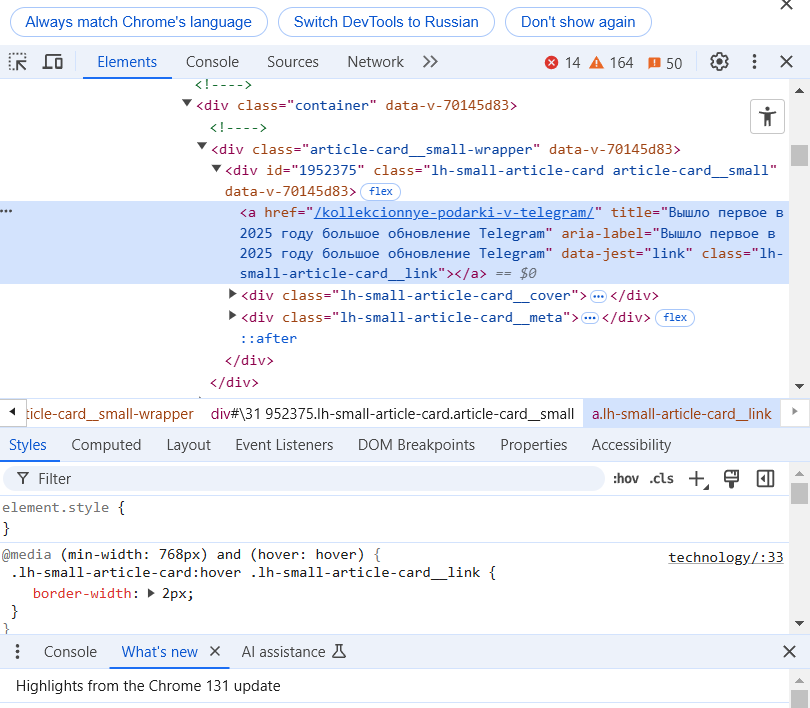

Поэтому воспользуемся html-кодом для комментария.

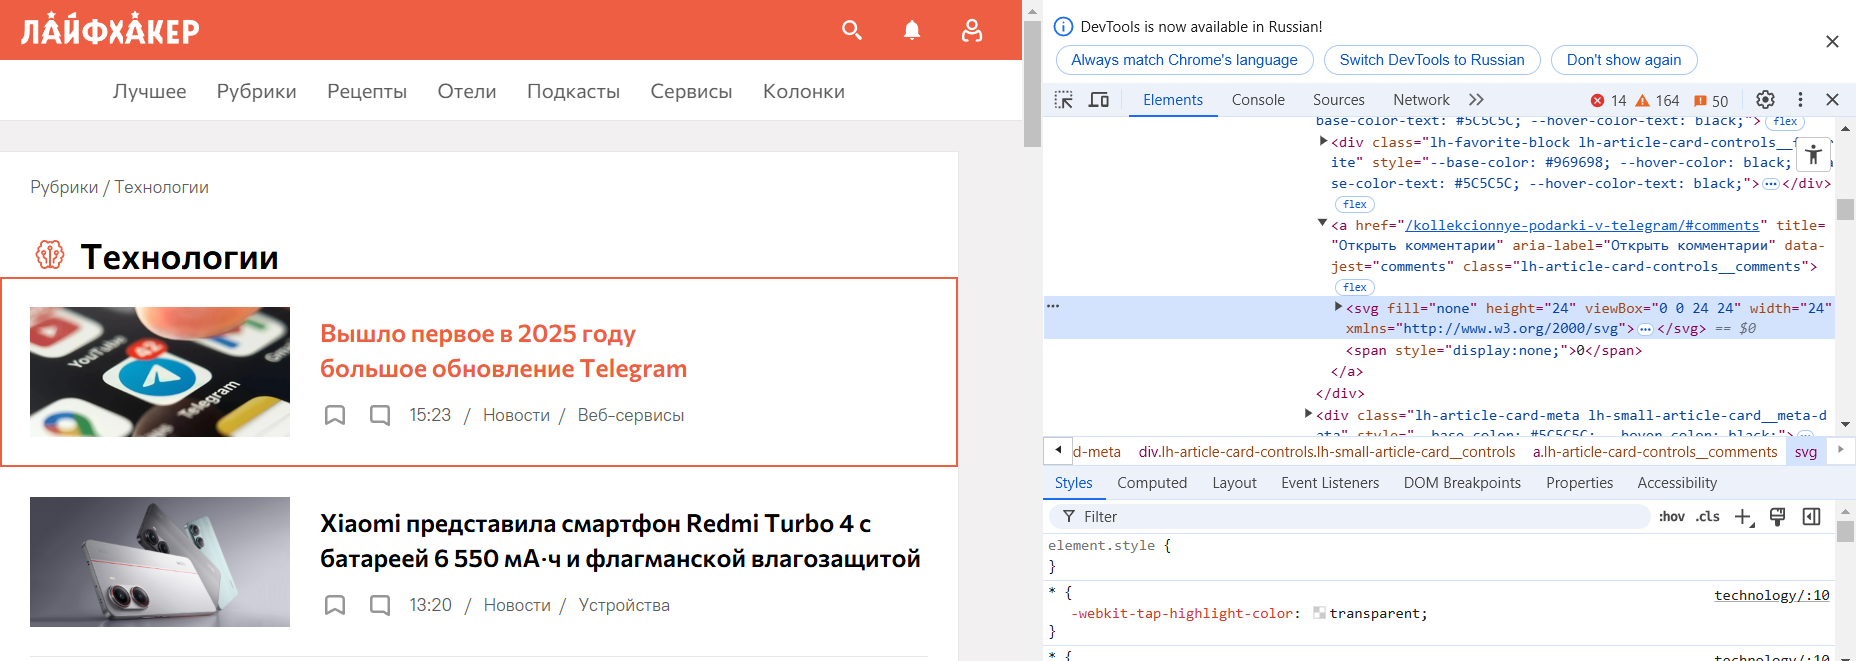

In [21]:
raw_items = soup.find_all('a', class_='lh-article-card-controls__comments')  # ищем все a-элементы с классом tm-article-comments-counter-link__link
links = [item.get('href').replace('/#comments', '') for item in raw_items] # получаем у ссылок только href-атрибут, убираем подстроку '/#comments'
links # список ссылок с первой страницы (точнее это вторая часть ссылки)

['/kollekcionnye-podarki-v-telegram',
 '/anons-redmi-turbo-4',
 '/new-year-resolution',
 '/luchshie-prilozheniya-dlya-android',
 '/kak-zablokirovat-nomer-telefona',
 '/iphone-and-ipad-newbies-apps',
 '/smartfony-dekabrya-2024',
 '/prilozheniya-karaoke',
 '/obzor-sravnenie-naushnikov-tecno-buds-4-i-buds-4-air',
 '/prilozheniya-dlya-ios-dekabr-2024',
 '/gaid-po-vyboru-smartfona-tecno',
 '/koncept-pk-v-vide-svitka',
 '/v-rossii-zapretili-zvonki-s-ip-telefonii',
 '/prilozheniy-android-dekabr-2024',
 '/smartfony-realme',
 '/predstavlen-minisforum-mdsa156',
 '/obzor-tecno-megabook-t16',
 '/v-telegram-ispravili-peregrev-iphone',
 '/galaxy-ring-2-mogut-predstavit-v-yanvare',
 '/bag-windows-11-obnovleniya-bezopasnosti',
 '/protokol-matter',
 '/anons-oneplus-buds-ace-2',
 '/tecno-megapad-11-obzor',
 '/poilka-dlya-kotov-xiaomi',
 '/anons-oneplus-ace-5',
 '/modulnaya-ayaneo-3',
 '/anons-umnogo-svetilnika-xiaomi',
 '/luchshie-gadzhety-2024']

In [22]:
parsed_urls = []

for page_num in range(1, 11):
    url = f'{base_url}/?page={page_num}' # подставляем нужный номер страницы для пагинации, дальше парсим каждую страницу аналогично коду выше
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    raw_items = soup.find_all('a', class_='lh-article-card-controls__comments')
    parsed_urls += [item.get('href').replace('/#comments', '') for item in raw_items]

parsed_urls # список вторых частей ссылки с первых 10 страниц

['/kollekcionnye-podarki-v-telegram',
 '/anons-redmi-turbo-4',
 '/new-year-resolution',
 '/luchshie-prilozheniya-dlya-android',
 '/kak-zablokirovat-nomer-telefona',
 '/iphone-and-ipad-newbies-apps',
 '/smartfony-dekabrya-2024',
 '/prilozheniya-karaoke',
 '/obzor-sravnenie-naushnikov-tecno-buds-4-i-buds-4-air',
 '/prilozheniya-dlya-ios-dekabr-2024',
 '/gaid-po-vyboru-smartfona-tecno',
 '/koncept-pk-v-vide-svitka',
 '/v-rossii-zapretili-zvonki-s-ip-telefonii',
 '/prilozheniy-android-dekabr-2024',
 '/smartfony-realme',
 '/predstavlen-minisforum-mdsa156',
 '/obzor-tecno-megabook-t16',
 '/v-telegram-ispravili-peregrev-iphone',
 '/galaxy-ring-2-mogut-predstavit-v-yanvare',
 '/bag-windows-11-obnovleniya-bezopasnosti',
 '/protokol-matter',
 '/anons-oneplus-buds-ace-2',
 '/tecno-megapad-11-obzor',
 '/poilka-dlya-kotov-xiaomi',
 '/anons-oneplus-ace-5',
 '/modulnaya-ayaneo-3',
 '/anons-umnogo-svetilnika-xiaomi',
 '/luchshie-gadzhety-2024',
 '/pc-gamer-luchshie-noutbuki-2024',
 '/ii-pomoshhnik-v-c

In [23]:
response = requests.get('https://lifehacker.ru/iphone-and-ipad-newbies-apps/') # работа с контентом
soup = BeautifulSoup(response.text, 'lxml')
soup.find('div', class_='single-article').text.replace("\n", "") # текст статьи

"iOS     1 января  Что установить на новый iPhone или\xa0iPadСамые интересные и полезные программы из App Store. Артём Козориз Автор Лайфхакера    Избранное        Оглавление              Офис                      Продуктивность                      Соцсети и мессенджеры                      Чтение и новости                      Образ жизни                      Полезные утилиты                      Образование                      Музыка                      Видео                      Фотография                      Навигация                      Здоровье и спорт                      Дополненная реальность                      Игры            Оглавление               Офис                      Продуктивность                      Соцсети и мессенджеры                      Чтение и новости                      Образ жизни                      Полезные утилиты                      Образование                      Музыка                      Видео                      Фотография            

In [24]:
soup.find('h1', class_='article-card__title').text # заголовок статьи

'Что установить на новый iPhone или\xa0iPad'

In [25]:
from tqdm import tqdm
base_url = 'https://lifehacker.ru/' # базовая часть ссылки

result = []

for url in tqdm(parsed_urls):
    article = {}
    article_url = f'{base_url}{url}' # подставляем часть ссылки, ведущую на материал
    response = requests.get(article_url)
    soup = BeautifulSoup(response.text, 'lxml')


    article['title'] = soup.find('h1', class_='article-card__title').text.replace("\n", "")
    article['text'] = soup.find('div', class_='single-article').text.replace("\n", "")

    result.append(article)

100%|██████████| 294/294 [08:50<00:00,  1.80s/it]


In [26]:
pd.set_option('display.max_colwidth', 400)

data = pd.DataFrame(result)
data.head()

,title,text
0,Вышло первое в 2025 году большое обновление Telegram,"НовостиВеб-сервисы 15:23 Вышло первое в 2025 году большое обновление TelegramТеперь пользователи могут зарабатывать на подарках и считывать QR-коды прямо в приложении. Макс Вильтовский Автор Лайфхакера Избранное Команда Telegram выпустила первое в 2025 году обновление. Оно включает фильтры для более удобного поиска сообщений, встроенный сканер QR-кодов и многое другое. Вот все н..."
1,Xiaomi представила смартфон Redmi Turbo 4 с батареей 6 550 мА⋅ч и флагманской влагозащитой,"НовостиУстройства 13:20 Xiaomi представила смартфон Redmi Turbo 4 с батареей 6 550 мА⋅ч и флагманской влагозащитойАппарат получил большой и яркий экран. Макс Вильтовский Автор Лайфхакера Избранное В Китае состоялся анонс смартфона Redmi Turbo 4. Это первый аппарат, оснащённый недавно представленным процессором MediaTek Dimensity 8400, который был доработан Xiaomi и получил назван..."
2,"Сервисы и приложения, которые помогут вам достичь своих целей в новом году","Технологии 09:00 Сервисы и приложения, которые помогут вам достичь своих целей в новом годуС ними вы сможете полагаться не только на силу воли. Артём Козориз Автор Лайфхакера Избранное Оглавление Избавиться от вредных привычек и завести полезные Заняться спортом и привести себя в форму Правильно питаться ..."
3,"45 лучших приложений для Android, которые стоит установить","ЛикбезТехнологии Вчера 45 лучших приложений для Android, которые стоит установитьПрокачайте свой смартфон или планшет и получите больше удовольствия от его использования.\r Антон Мартынов Автор Лайфхакера Избранное Оглавление Лучшие полезные приложения для Android Лучшие социальные приложения для Android Лучшие приложения дл..."
4,"Как заблокировать номер телефона, чтобы не звонили","ЛикбезТехнологии 1 января Как заблокировать номер телефона, чтобы не звонилиСледуйте этим простым советам — и вас больше не побеспокоят. Артём Козориз Автор Лайфхакера Избранное Оглавление Как заблокировать номер телефона на Android Как заблокировать номер телефона на iPhone Оглавление Как заблокировать номер телефона на..."
